In [1]:
from pathlib import Path
import requests
import pickle
import gzip
from matplotlib import pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
import math

import RNN_model

In [2]:
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [3]:
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train.reshape(x_train.shape[0],784,1), y_train, x_valid.reshape(x_valid.shape[0],784,1), y_valid)
)

x_valid = x_valid[:200]
y_valid = y_valid[:200]

x_train = x_train[:200]
y_train = y_train[:200]

train_ds = TensorDataset(x_train, y_train)
n, c, temp = x_train.shape
bs = 64  # batch size
train_dl = DataLoader(train_ds, batch_size=bs)

In [4]:
n_steps = 28*28
n_inputs = 1
n_neurons = 200
n_outputs = 10
loss_func = F.cross_entropy
opt_func = optim.Adam
lr = 0.5

model = RNN_model.get_model(n_steps, n_inputs, n_neurons, n_outputs, loss_func, opt_func, lr)

In [5]:
print(model.accuracy(x_valid, y_valid))

tensor(0.1000)


0
1
2
tensor(0.1350)


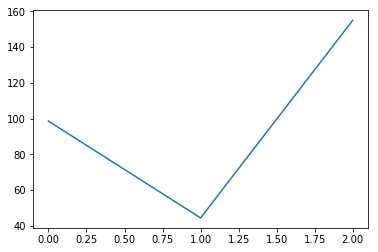

In [6]:
loss_array = model.fit(3,train_dl)

plt.plot(loss_array)

print(model.accuracy(x_valid, y_valid))